In [5]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from matplotlib import rcParams

sns.set_style('darkgrid')
rcParams['figure.figsize'] = 10,7

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

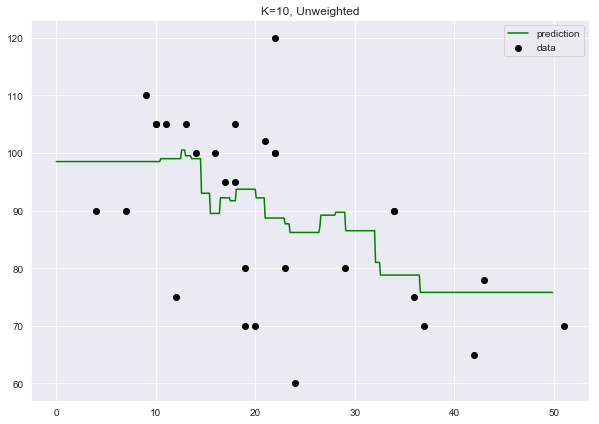

In [7]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

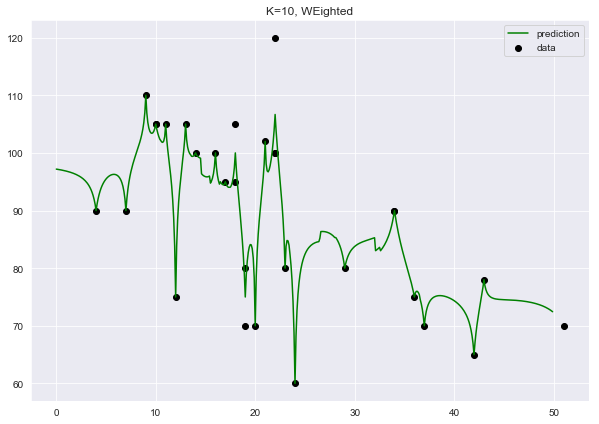

In [33]:
# Run the same model, this time with weights
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X= pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line
T = np.arange(0, 50, 0.1)[:, np.newaxis] # tell me about this syntax

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, WEighted')
plt.show()

In [17]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print('Unweighted Accuracy: %0.2f (+/-%0.2f)' % (score.mean(), score.std() *2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print('Weighted Accuracy: %0.2f (+/- %0.2f' % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/-0.66)
Weighted Accuracy: 0.11 (+/- 0.94


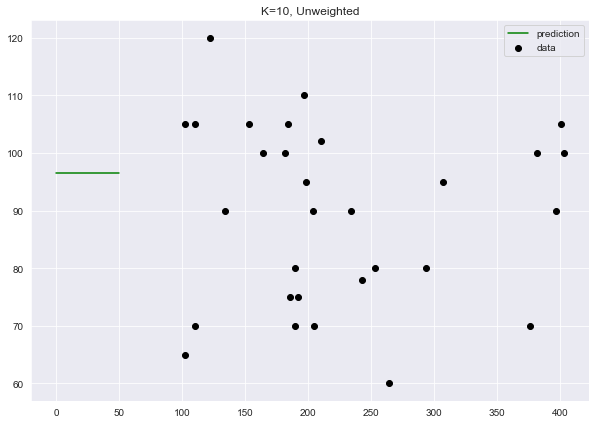

In [56]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.duration)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

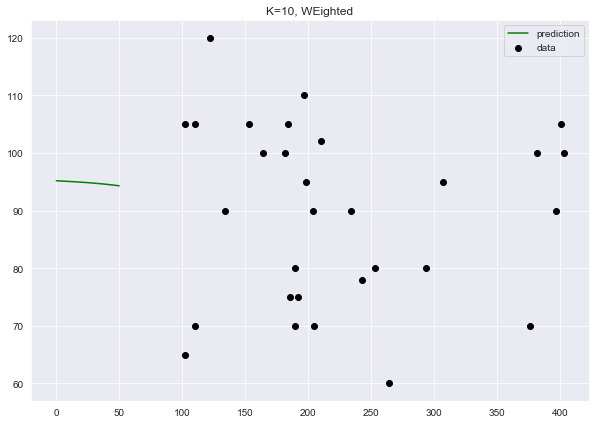

In [63]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X= pd.DataFrame(music.duration)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line
T = np.arange(0, 50, 0.1)[:, np.newaxis] # tell me about this syntax

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, WEighted')
plt.show()

In [64]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print('Unweighted Accuracy: %0.2f (+/-%0.2f)' % (score.mean(), score.std() *2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print('Weighted Accuracy: %0.2f (+/- %0.2f' % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.44 (+/-0.81)
Weighted Accuracy: -0.78 (+/- 0.77
